In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la

In [3]:
data = np.load("../data/power.npz")
scattpos = np.load("../data/scattpos.npz")["scattpos"]

Text(0, 0.5, 'P')

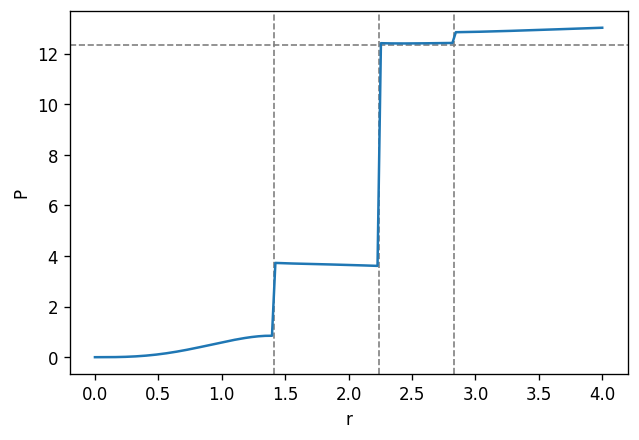

In [4]:
plt.figure(dpi=120)

for i in range(scattpos.shape[0]):
    plt.axvline(la.norm(scattpos[i, :]), color="gray", linewidth='1', linestyle='dashed')
plt.axhline(12.344212378989026, color="gray", linewidth='1', linestyle='dashed')
plt.plot(data["r"], data["P"])

plt.xlabel("r")
plt.ylabel("P")